# initial 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import rasterio as rio
from pathlib import Path
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from src import *


plt.rcParams["figure.figsize"] = (20,10)
GPU_IDX = 0

def show(tensor,*args,**kwargs):   
    while len(tensor.shape)>3:
        tensor=tensor[0]
    plt.imshow(tensor.permute(1,2,0).detach().cpu(),*args,**kwargs)

In [3]:
import imageio

rgb_img = imageio.imread('imgs/rgb_example.png')[...,:3]/255

# to tensor (B,C,H,W)
rgb_img = torch.FloatTensor(rgb_img).permute(2,0,1)

C:\Users\thoma\AppData\Local\Temp\ipykernel_4840\2539462654.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rgb_img = imageio.imread('imgs/rgb_example.png')[...,:3]/255


In [4]:
b_img=rgb_img.expand(4,3,256,256)
cl, cmask, smask = add_cloud_and_shadow(b_img,
                                        return_cloud=True
                                       )

# Multi-Spectral Data
While the magnitude of the clouds is quite comparable in the RGB bands (since they appear in approximately white colour), the relationship between the cloud strength and channel frequency is generally more complex.

As an example, let's open an example file containing 12 bands from Sentinel-2 L1C (except for Band 10, which often interacts with the clouds quite differently).

In [14]:
imgPath = r"C:\Users\thoma\AIML2024Summer\datasets\Landsat-9-Level-1\products\LC09_L1TP_063046_20221202_20230319_02_T1\LC09_L1TP_063046_20221202_20230319_02_T1_B1.TIF"

In [20]:
with rio.open(imgPath, 'r') as f:
    uint16_array = f.read()

In [22]:
uint16_array = uint16_array[0]

In [23]:
uint16_array.shape

(7851, 7701)

In [8]:
int16_array = uint16_array.astype(np.int16)

In [9]:
int16_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)

In [10]:
cloudy=torch.from_numpy(int16_array)

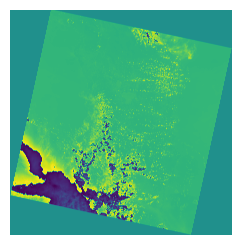

In [11]:
for idx,img in enumerate(cloudy):
    plt.subplot(2,6,1+idx)
    plt.imshow(img)
    plt.axis('off')

In [15]:
i = 3

imgPath = f"C:\\Users\\thoma\\AIML2024Summer\\LC09_L1TP_063046_20221202_20230319_02_T1\LC09_L1TP_063046_20221202_20230319_02_T1_B{i}.TIF"
rawPath = rf"{imgPath}"

with rio.open(rawPath, 'r') as f:
    uint16_array = f.read()

int16_array = uint16_array.astype(np.int16)
int16_array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)

In [16]:
cloudy=torch.from_numpy(int16_array)

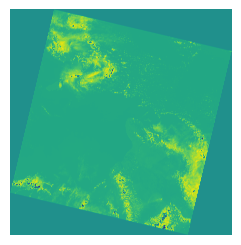

In [17]:
for idx,img in enumerate(cloudy):
    plt.subplot(2,6,1+idx)
    plt.imshow(img)
    plt.axis('off')

In [18]:
cloudy

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int16)

In [19]:

# Create two NumPy arrays
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

# Append array2 to array1
result_array = np.append(array1, array2)

print("Array 1:", array1)
print("Array 2:", array2)
print("Result Array:", result_array)


Array 1: [1 2 3]
Array 2: [4 5 6]
Result Array: [1 2 3 4 5 6]


# compute and identifys clouds

In [5]:
cloudyimgs = []

In [6]:
for i in range(1,12):
    imgPath = f"C:\\Users\\thoma\\AIML2024Summer\\LC09_L1TP_063046_20221202_20230319_02_T1\LC09_L1TP_063046_20221202_20230319_02_T1_B{i}.TIF"
    rawPath = rf"{imgPath}"

    
    
    with rio.open(rawPath, 'r') as f:
        uint16_array = f.read()
    
    int16_array = uint16_array.astype(np.int16)

    cloudy=torch.from_numpy(int16_array)

    cloudyimgs.append(cloudy)
    
    print(f"B{i} worked")


B1 worked
B2 worked
B3 worked
B4 worked
B5 worked
B6 worked
B7 worked
B8 worked
B9 worked
B10 worked
B11 worked


In [13]:
cloudyimgs[10]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int8)

# plots clouds 

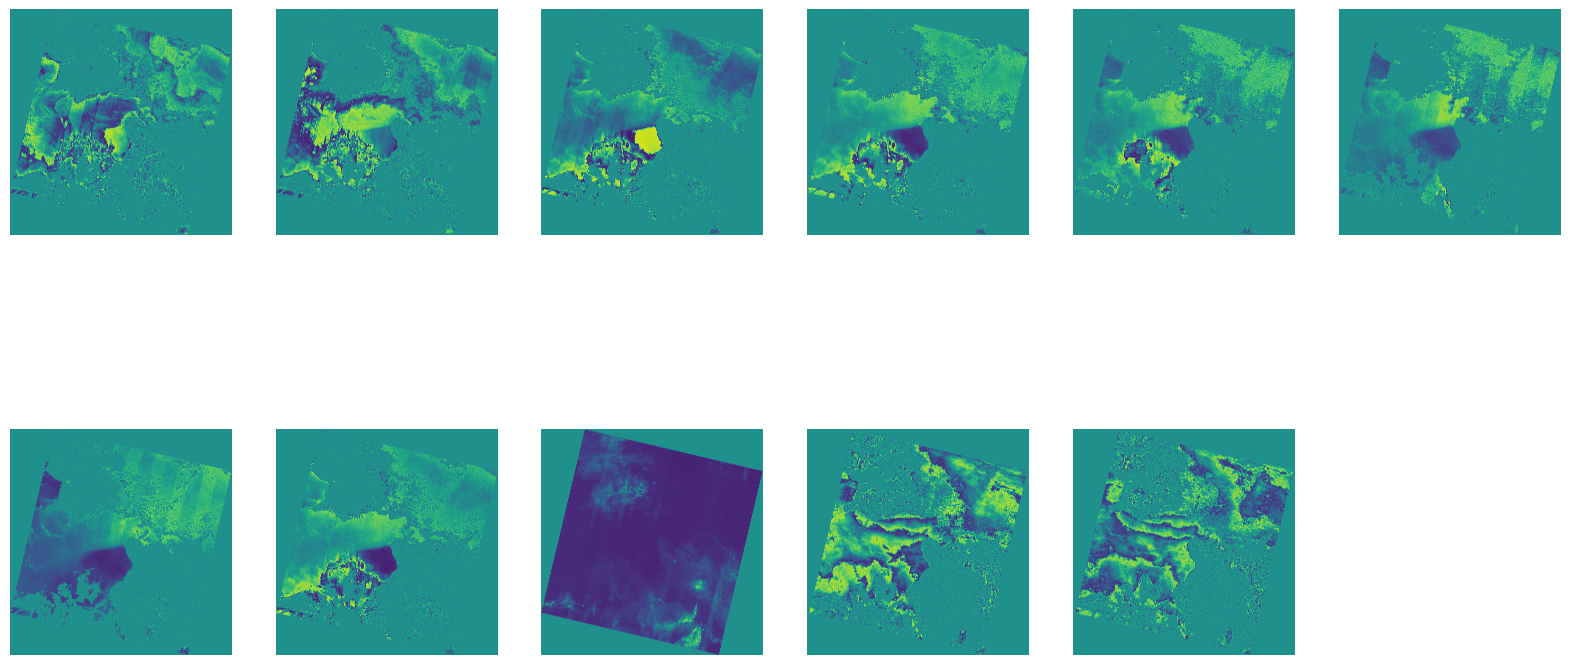

In [18]:
#plot hyperspectral img
for i in range(11):
    for idx, img in enumerate(cloudyimgs[i]):
            plt.subplot(2,6,i+1)
            plt.imshow(img, cmap='viridis')
            plt.axis('off')

In [64]:
rgbimg=[]
for i in range(4,1,-1):
    for idx, img in enumerate(cloudyimgs[i]):
        rgbimg.append(img)

In [68]:
rgbimg

[tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int16),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int16),
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int16)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 7760.5, 7620.5, -0.5)

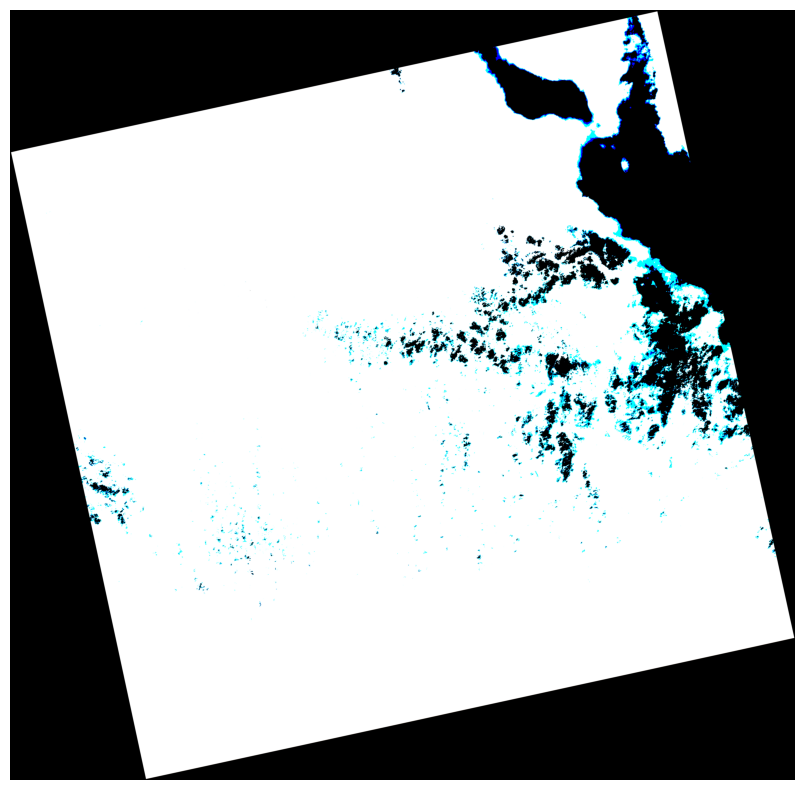

In [71]:
rgbimg = np.transpose(rgbimg, (1,2,0))
plt.imshow(rgbimg)
plt.axis('off')

In [7]:
out=add_cloud(clean,
              locality_degree=2,
              channel_magnitude=cmags)

for idx,img in enumerate(out[0]):
    plt.subplot(2,6,1+idx)
    plt.imshow(img)
    plt.axis('off')

NameError: name 'cmags' is not defined

# compute, identifys clouds and plots

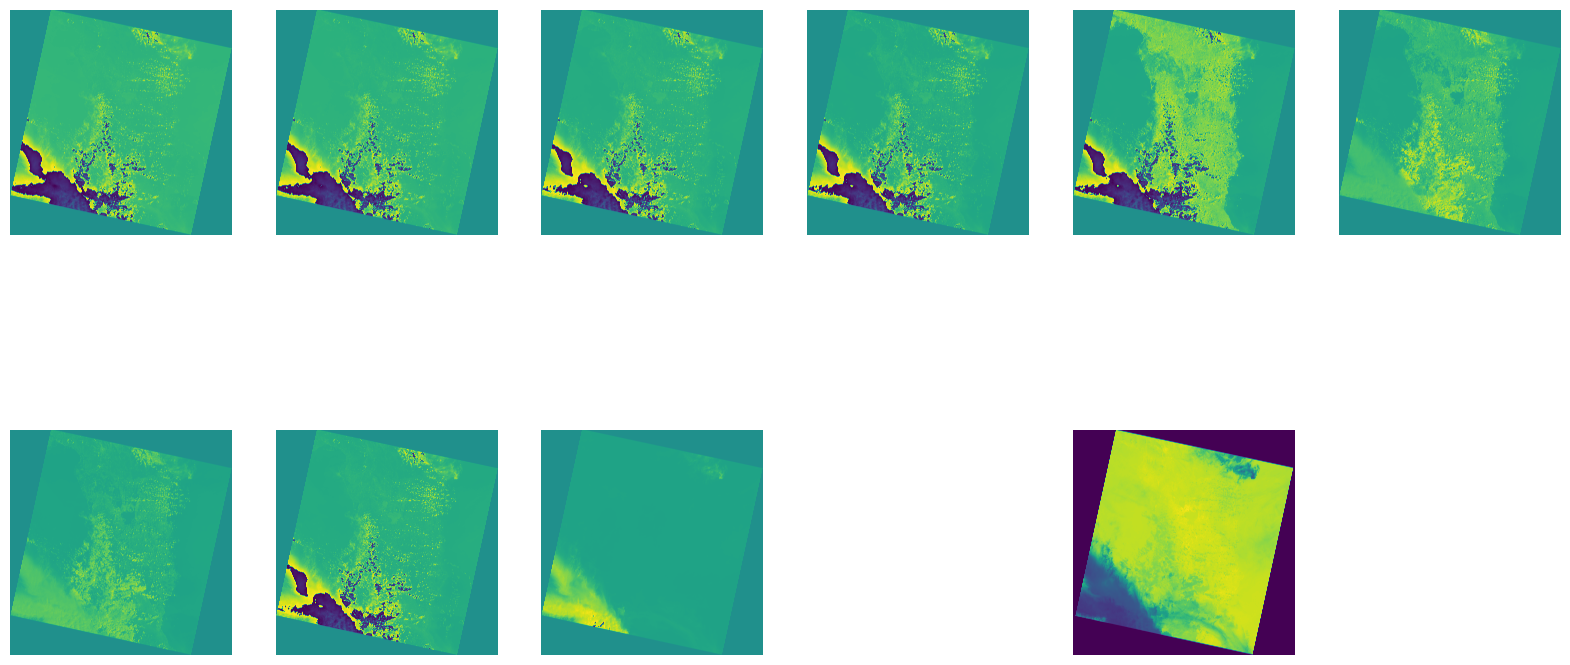

In [59]:
for i in range(1,12):
    if i != 10:
        imgPath = f"C:\\Users\\thoma\\AIML2024Summer\\LC09_L1TP_114063_20240112_20240112_02_T1\\LC09_L1TP_114063_20240112_20240112_02_T1_B{i}.TIF"
        rawPath = rf"{imgPath}"
        
        with rio.open(rawPath, 'r') as f:
            uint16_array = f.read()
        
        int16_array = uint16_array.astype(np.int16)

        cloudy=torch.from_numpy(int16_array)
        
        for idx, img in enumerate(cloudy):
                plt.subplot(2,6,i)
                plt.imshow(img, cmap='viridis')
                plt.axis('off')
            
